In [1]:
# Import libraries necessary for this project
! pip install 


import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit



Defaulting to user installation because normal site-packages is not writeable


ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('D:/diploma AI/advanced_machine_learning_course_Amit/matriales/boston_housing_project_one_machine_learning/sessions/housing.csv')
data.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RM,489.0,6.240288,0.643650,3.561,5.88,6.185,6.575,8.398
LSTAT,489.0,12.939632,7.081990,1.980,7.37,11.690,17.120,37.970
PTRATIO,489.0,18.516564,2.111268,12.600,17.40,19.100,20.200,22.000
MEDV,489.0,454342.944785,165340.277653,105000.000,350700.00,438900.000,518700.000,1024800.000


In [5]:
data.shape

(489, 4)

In [6]:
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# print the shape of the data
print('Boston housing dataset has {0} data points with {1} variables each.'.format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [7]:

# TODO: Minimum price of the data
minimum_price = min(data['MEDV'])

# TODO: Maximum price of the data
maximum_price = max(data['MEDV'])

# TODO: Mean price of the data
mean_price = (data['MEDV']).mean()

# TODO: Median price of the data
median_price = (data['MEDV']).median()

# TODO: Standard deviation of prices of the data
std_price = (data['MEDV']).std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Absolute Error: 64277.29
Mean Squared Error: 6789025559.27
R² Score: 0.69


In [11]:
# Display feature importance
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
print(coefficients)


   Feature   Coefficient
0       RM  87322.203619
1    LSTAT -10620.637315
2  PTRATIO -19324.410296


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest Model:")
print(f"Mean Absolute Error: {rf_mae:.2f}")
print(f"R² Score: {rf_r2:.2f}")


Random Forest Model:
Mean Absolute Error: 43862.79
R² Score: 0.85


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 200}


In [14]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Suppress matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

def ModelLearning(X, y):
    """Calculates the performance of several models with varying sizes of training data.
       The learning and testing scores for each model are then plotted."""
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0] * 0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig, axes = plt.subplots(2, 2, figsize=(10, 7))

    # Create four different models based on max_depth
    for k, depth in enumerate([1, 3, 6, 10]):
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth=depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(
            regressor, X, y, cv=cv, train_sizes=train_sizes, scoring='r2'
        )
        
        # Find the mean and standard deviation for smoothing
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Subplot the learning curve 
        ax = axes[k//2, k%2]
        ax.plot(sizes, train_mean, 'o-', color='r', label='Training Score')
        ax.plot(sizes, test_mean, 'o-', color='g', label='Testing Score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='g')
        
        # Labels
        ax.set_title(f'max_depth = {depth}')
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0] * 0.8])
        ax.set_ylim([-0.05, 1.05])
        ax.legend(loc='lower right')
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=16, y=1.03)
    fig.tight_layout()
    plt.show()



C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p

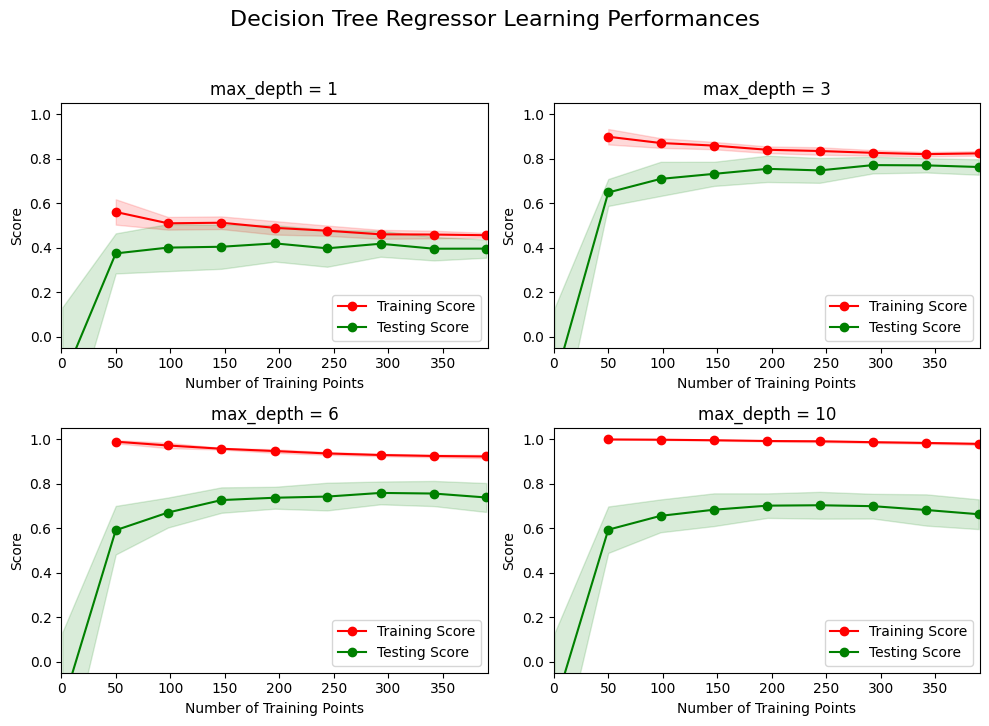

In [15]:
ModelLearning(features, prices)

In [16]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_test, y_predict):
    """ Calculates and returns the performance score between 
        test and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_test' and 'y_predict'
    score = r2_score(y_test, y_predict)
    
    # Return the score
    return score

In [17]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [18]:
# Assuming X_train and y_train are already defined
reg = fit_model(X_train, y_train)
print(f"Optimal 'max_depth': {reg.get_params()['max_depth']}")


TypeError: ShuffleSplit.__init__() got an unexpected keyword argument 'n_iter'

In [100]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $302,400.00
Predicted selling price for Client 2's home: $289,800.00
Predicted selling price for Client 3's home: $697,200.00


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
